In [3]:
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt
import pickle
from PIL import ImageFont, ImageDraw, Image

In [4]:
classToUnicode = [
"\u0BBE",
"\u0B85",
"\u0B86",
"\u0B87",
"\u0B88",
"\u0B89",
"\u0B8A",
"\u0B8E",
"\u0B8F",
"\u0B90",
"\u0B92",
"\u0B93",
"\u0B94",
"\u0B83",
"\u0B95\u0BCD",
"\u0B95",
"\u0B95\u0BBF",
"\u0B95\u0BC0",
"\u0B95\u0BC1",
"\u0B95\u0BC2",
"\u0B9A\u0BCD",
"\u0B9A",
"\u0B9A\u0BBF",
"\u0B9A\u0BC0",
"\u0B9A\u0BC1",
"\u0B9A\u0BC2",
"\u0B99\u0BCD",
"\u0B99",
"\u0B99\u0BBF",
"\u0B99\u0BC0",
"\u0B99\u0BC1",
"\u0B99\u0BC2",
"\u0B9E\u0BCD",
"\u0B9E",
"\u0B9E\u0BBF",
"\u0B9E\u0BC0",
"\u0B9E\u0BC1",
"\u0B9E\u0BC2",
"\u0B9F\u0BCD",
"\u0BA8",
"\u0B9F\u0BBF",
"\u0B9F\u0BC0",
"\u0B9F\u0BC1",
"\u0B9F\u0BC2",
"\u0BA3\u0BCD",
"\u0BA3",
"\u0BA3\u0BBF",
"\u0BA3\u0BC0",
"\u0BA3\u0BC1",
"\u0BA3\u0BC2",
"\u0BA4\u0BCD",
"\u0BA4",
"\u0BA4\u0BBF",
"\u0BA4\u0BC0",
"\u0BA4\u0BC1",
"\u0BA4\u0BC2",
"\u0BA8\u0BCD",
"\u0BA8",
"\u0BA8\u0BBF",
"\u0BA8\u0BC0",
"\u0BA8\u0BC1",
"\u0BA8\u0BC2",
"\u0BAA\u0BCD",
"\u0BAA",
"\u0BAA\u0BBF",
"\u0BAA\u0BC0",
"\u0BAA\u0BC1",
"\u0BAA\u0BC2",
"\u0BAE\u0BCD",
"\u0BAE",
"\u0BAE\u0BBF",
"\u0BAE\u0BC0",
"\u0BAE\u0BC1",
"\u0BAE\u0BC2",
"\u0BAF\u0BCD",
"\u0BAF",
"\u0BAF\u0BBF",
"\u0BAF\u0BC0",
"\u0BAF\u0BC1",
"\u0BAF\u0BC2",
"\u0BB0\u0BCD",
"\u0BB0",
"\u0BB0\u0BBF",
"\u0BB0\u0BC0",
"\u0BB0\u0BC1",
"\u0BB0\u0BC2",
"\u0BB2\u0BCD",
"\u0BB2",
"\u0BB2\u0BBF",
"\u0BB2\u0BC0",
"\u0BB2\u0BC1",
"\u0BB2\u0BC2",
"\u0BB3\u0BCD",
"\u0B83",
"\u0BB3\u0BBF",
"\u0BB3\u0BC0",
"\u0BB3\u0BC1",
"\u0BB3\u0BC2",
"\u0BB1\u0BCD",
"\u0BB1",
"\u0BB1\u0BBF",
"\u0BB1\u0BC0",
"\u0BB1\u0BC1",
"\u0BB1\u0BC2",
"\u0BB5\u0BCD",
"\u0BB5",
"\u0BB5\u0BBF",
"\u0BB5\u0BC0",
"\u0BB5\u0BC1",
"\u0BB5\u0BC2",
"\u0BB4\u0BCD",
"\u0BB4",
"\u0BB4\u0BBF",
"\u0BB4\u0BC0",
"\u0BB4\u0BC1",
"\u0BB4\u0BC2",
"\u0BA9\u0BCD",
"\u0BA9",
"\u0BA9\u0BBF",
"\u0BA9\u0BC0",
"\u0BA9\u0BC1",
"\u0BB7\u0BBF",
"\u0BB7\u0BC0",
"\u0BB7\u0BC1",
"\u0BB7\u0BC2",
"\u0B95\u0BCD\u0BB7",
"\u0B95\u0BCD\u0BB7\u0BCD",
"\u0B95\u0BCD\u0BB7\u0BBF",
"\u0B95\u0BCD\u0BB7\u0BC0",
"\u0B9C\u0BC1",
"\u0B9C\u0BC2",
"\u0BB9",
"\u0BB9\u0BCD",
"\u0BB9\u0BBF",
"\u0BB9\u0BC0",
"\u0BB9\u0BC1",
"\u0BB9\u0BC2",
"\u0BB8",
"\u0BB8\u0BCD",
"\u0BB8\u0BBF",
"\u0BB8\u0BC0",
"\u0BB8\u0BC1",
"\u0BB8\u0BC2",
"\u0BB7",
"\u0BB7\u0BCD",
"\u0BA9\u0BC2",
"\u0BB8\u0BCD\u0BB0\u0BC0",
"\u0B95\u0BCD\u0BB7\u0BC2",
"\u0B9C",
"\u0B9C\u0BCD",
"\u0B9C\u0BBF",
"\u0B9C\u0BC0",
"\u0B95\u0BCD\u0BB7\u0BC1",
"\u0BC6",
"\u0BC7",
"\u0BC8"
]


In [5]:
model = pickle.load(open('Basic_CNN.sav', 'rb'))

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-02-24 15:58:48         3797
metadata.json                                  2023-02-24 15:58:48           64
variables.h5                                   2023-02-24 15:58:48    161677480
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10


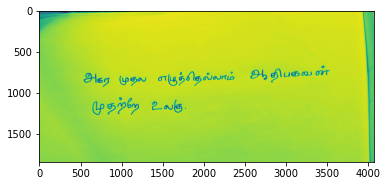

In [6]:
folder = "custom_images"
file = 'kural.jpg'
image = cv2.imread(folder+"/"+file)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# gray = cv2.GaussianBlur(gray, (1, 1), 0)
plt.imshow(gray)

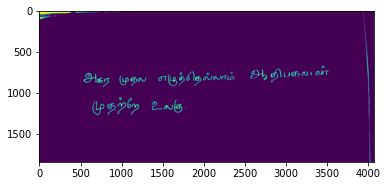

In [7]:
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh)

In [8]:
# dilate = cv2.dilate(thresh, None, iterations=2)

In [9]:
# cnts = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL,
#     cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0]

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(1,1)) 

dilated = cv2.dilate(thresh,kernel,iterations = 5) 

cnts = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE) 
cnts = cnts[0]

In [10]:
sorted_ctrs = sorted(cnts, key=lambda ctr: cv2.boundingRect(ctr)[0] + cv2.boundingRect(ctr)[1] * image.shape[1] )

1/1 [==============================] - 0s 121ms/step


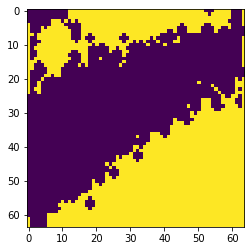

1/1 [==============================] - 0s 24ms/step


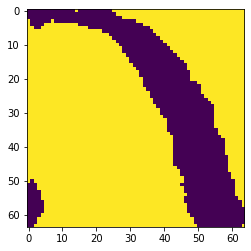

1/1 [==============================] - 0s 24ms/step


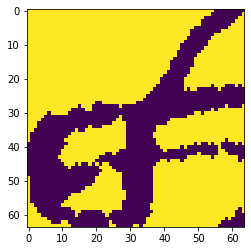

1/1 [==============================] - 0s 26ms/step


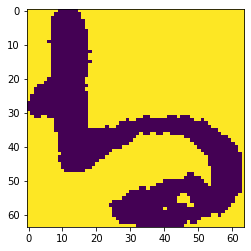

1/1 [==============================] - 0s 26ms/step


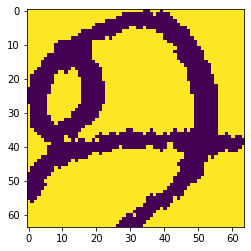

1/1 [==============================] - 0s 26ms/step


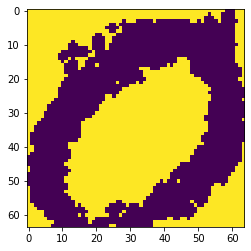

1/1 [==============================] - 0s 25ms/step


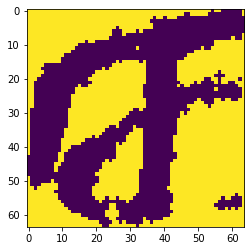

1/1 [==============================] - 0s 27ms/step


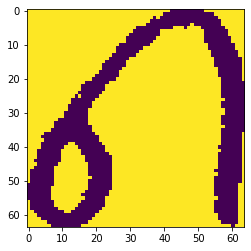

1/1 [==============================] - 0s 44ms/step


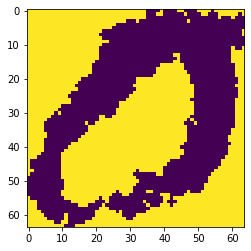

1/1 [==============================] - 0s 25ms/step


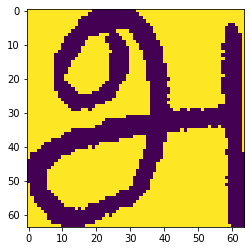

1/1 [==============================] - 0s 37ms/step


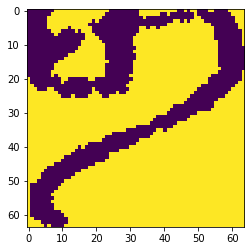

1/1 [==============================] - 0s 96ms/step


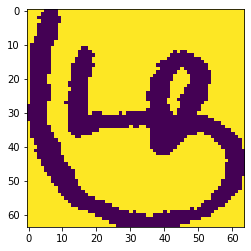

1/1 [==============================] - 0s 28ms/step


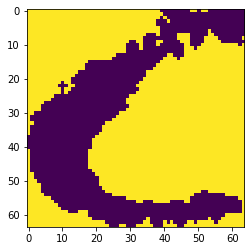

1/1 [==============================] - 0s 28ms/step


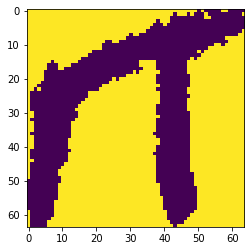

1/1 [==============================] - 0s 27ms/step


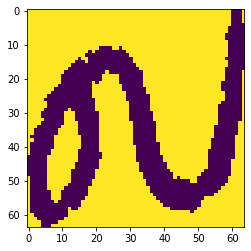

1/1 [==============================] - 0s 27ms/step


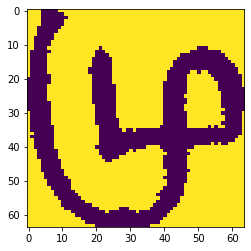

1/1 [==============================] - 0s 27ms/step


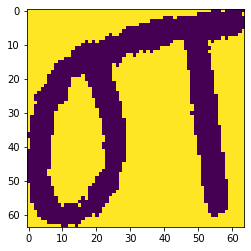

1/1 [==============================] - 0s 28ms/step


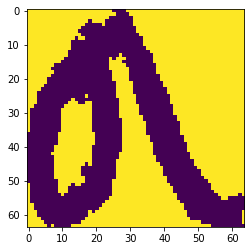

1/1 [==============================] - 0s 24ms/step


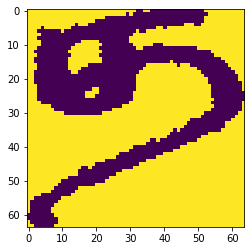

1/1 [==============================] - 0s 25ms/step


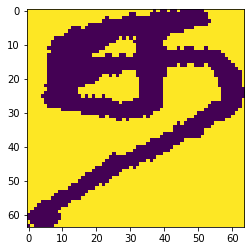

1/1 [==============================] - 0s 30ms/step


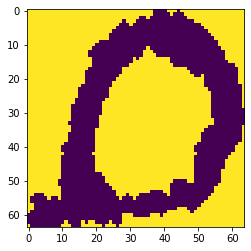

1/1 [==============================] - 0s 37ms/step


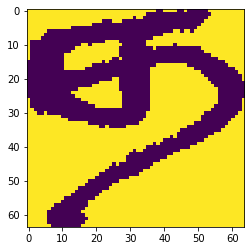

1/1 [==============================] - 0s 26ms/step


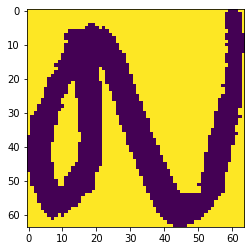

1/1 [==============================] - 0s 28ms/step


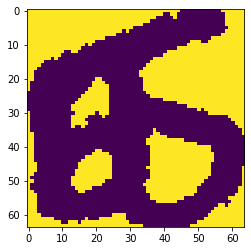

1/1 [==============================] - 0s 31ms/step


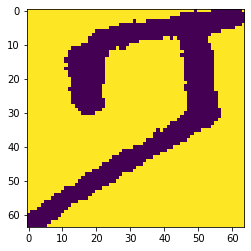

1/1 [==============================] - 0s 28ms/step


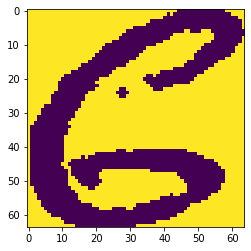

1/1 [==============================] - 0s 26ms/step


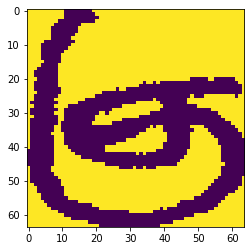

1/1 [==============================] - 0s 24ms/step


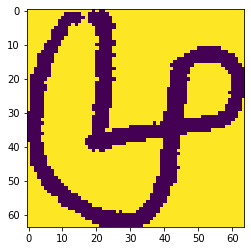

1/1 [==============================] - 0s 25ms/step


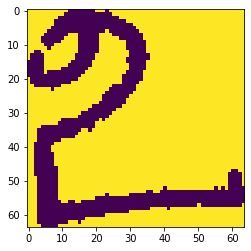

1/1 [==============================] - 0s 24ms/step


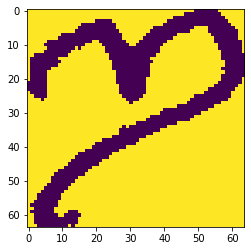

1/1 [==============================] - 0s 26ms/step


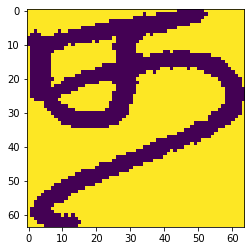

1/1 [==============================] - 0s 33ms/step


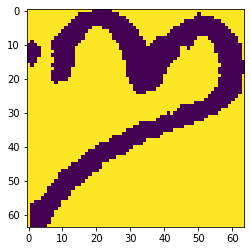

1/1 [==============================] - 0s 25ms/step


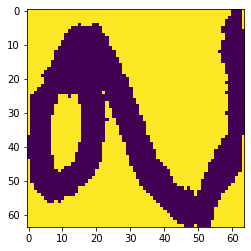

In [11]:
orig = image.copy()
i = 0
# images = []
letters = []


for cnt in sorted_ctrs:
    # Check the area of contour, if it is very small ignore it
    if(cv2.contourArea(cnt) < 200):
        continue

    # Filtered countours are detected
    x,y,w,h = cv2.boundingRect(cnt)
    
    if h>300 or w>300:   
          continue   
    if h<40 or w<40:   
          continue  
    
    # Taking ROI of the cotour
    roi = image[y:y+h, x:x+w]
    
    img = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(64,64))/255
    img = cv2.convertScaleAbs(img)
    img = cv2.bilateralFilter(img, 1, 75, 75)
    
    
    predict_x=model.predict(np.array([img]))

    classes_x=np.argmax(predict_x,axis=1)

    plt.imshow(img)
    plt.show()

#     # Mark them on the image if you want
    cv2.rectangle(orig,(x,y),(x+w,y+h),(0,255,0),2)
    # cv2.putText(orig, text= str(classes_x), org=(x,y),
    #         fontFace= cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0,0,0),
    #         thickness=2, lineType=cv2.LINE_AA)
    
    letters.append([x,y,classes_x[0]])
#     draw.text((x,y),'இ',font=font,fill = (0,0,0,0.5))

    # Save your contours or characters
#     cv2.imwrite("./Images/roi" + str(i) + ".png", roi)

    i = i + 1 



In [12]:
fontpath = './fonts/Latha.ttf'
font = ImageFont.truetype(fontpath,32)

pil_image = Image.fromarray(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
draw = ImageDraw.Draw(pil_image)

for x in letters:
    tamil_letter = classToUnicode[x[2]]
    draw.text((x[0],x[1]-40),tamil_letter,font=font,fill = (0,0,0,0)) 

orig = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

plt.imshow(orig)

OSError: cannot open resource

In [ ]:
# for i in range(0,156):
#     print(classToUnicode[i])

In [ ]:
cv2.imwrite(folder+"/_segmented1"+file,orig)